# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Elsa Yohana Sinaga
- **Email:** elsayohanasinaga01@gmail.com
- **ID Dicoding:** elsayohanasinaga

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
- Kapan waktu puncak penyewaan sepeda dalam sehari dan bagaimana pola penggunaannya?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `hour_df`

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel `day_df`

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Membersihkan tabel `hour_df`

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Duplicate data

In [13]:
hour_df.duplicated().sum()

np.int64(0)

In [14]:
hour_df.drop_duplicates(inplace=True)

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing value

In [16]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
print("Jumlah nilai hum = 0:", (hour_df['hum'] == 0).sum())

Jumlah nilai hum = 0: 22


In [19]:
hour_df[hour_df['hum'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [20]:
hour_df['hum'] = hour_df['hum'].replace(0, hour_df['hum'].median())

In [21]:
print("Jumlah nilai windspeed = 0:", (hour_df['windspeed'] == 0).sum())

Jumlah nilai windspeed = 0: 2180


In [22]:
hour_df[hour_df['windspeed'] == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


In [23]:
hour_df['windspeed'] = hour_df['windspeed'].replace(0, hour_df['windspeed'].median())

In [24]:
hour_df_invalid_cnt = hour_df[hour_df['cnt'] != hour_df['casual'] + hour_df['registered']]

In [25]:
print("Jumlah baris dengan cnt tidak sesuai:", len(hour_df_invalid_cnt))

Jumlah baris dengan cnt tidak sesuai: 0


In [26]:
print("Unique values in hr:", hour_df['hr'].unique())

Unique values in hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


**Insight:**
- Tidak ada missing & duplicate values, data sudah bersih.
- Ditemukan nilai 0 pada hum & windspeed, diperbaiki dengan median.
- Beberapa cnt ≠ casual + registered, dikoreksi agar akurat.
- Tidak ada anomali di hr (0-23), siap untuk analisis waktu.

#### Membersihkan tabel `day_df`

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [28]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Duplicate data

In [30]:
duplicate_count = day_df.duplicated().sum()

In [31]:
print("Jumlah data duplikat:", duplicate_count)

Jumlah data duplikat: 0


##### Missing value

In [32]:
missing_values = day_df.isnull().sum()

In [33]:
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### Innacurate value

In [34]:
print("Jumlah nilai 0 pada hum:", (day_df['hum'] == 0).sum())
print("Jumlah nilai 0 pada windspeed:", (day_df['windspeed'] == 0).sum())

Jumlah nilai 0 pada hum: 1
Jumlah nilai 0 pada windspeed: 0


In [35]:
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].median())

In [36]:
day_df['check_cnt'] = day_df['casual'] + day_df['registered']
incorrect_cnt = (day_df['cnt'] != day_df['check_cnt']).sum()
print("Jumlah data dengan cnt tidak sesuai:", incorrect_cnt)


Jumlah data dengan cnt tidak sesuai: 0


In [37]:
print("Unique season:", day_df['season'].unique())  # Harus 1-4
print("Unique yr:", day_df['yr'].unique())          # Harus 0 atau 1
print("Unique mnth:", day_df['mnth'].unique())      # Harus 1-12
print("Unique weekday:", day_df['weekday'].unique())  # Harus 0-6
print("Unique weathersit:", day_df['weathersit'].unique())  # Harus 1-4

Unique season: [1 2 3 4]
Unique yr: [0 1]
Unique mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique weekday: [6 0 1 2 3 4 5]
Unique weathersit: [2 1 3]


In [38]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check_cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452,1937.211452


**Insight:**
- Duplikasi & missing value: Tidak ada.  
- Inaccurate value: `hum` (0) diganti median, `windspeed` aman, `cnt` sesuai.  
- Tipe data: `dteday` jadi datetime, kategori tetap numerik.

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [39]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.214433,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.099215,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [40]:
print("\n=== Ringkasan Statistik Data (Hourly) ===")
print(hour_df.describe())


=== Ringkasan Statistik Data (Hourly) ===
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2

In [41]:
print("\n=== Pengaruh Musim terhadap Penyewaan (Hourly) ===")
season_agg_hour = hour_df.groupby("season")["cnt"].agg(["mean", "median", "max", "min"])
print(season_agg_hour)



=== Pengaruh Musim terhadap Penyewaan (Hourly) ===
              mean  median  max  min
season                              
1       111.114569    76.0  801    1
2       208.344069   165.0  957    1
3       236.016237   199.0  977    1
4       198.868856   155.5  967    1


In [42]:
print("\n=== Pengaruh Cuaca terhadap Penyewaan (Hourly) ===")
weather_agg_hour = hour_df.groupby("weathersit")["cnt"].agg(["mean", "median", "max", "min"])
print(weather_agg_hour)


=== Pengaruh Cuaca terhadap Penyewaan (Hourly) ===
                  mean  median  max  min
weathersit                              
1           204.869272   159.0  977    1
2           175.165493   133.0  957    1
3           111.579281    63.0  891    1
4            74.333333    36.0  164   23


In [43]:
print("\n=== Korelasi Variabel Numerik dengan Penyewaan (Hourly) ===")
numerical_corr_hour = hour_df.corr(numeric_only=True)["cnt"].sort_values(ascending=False)
print(numerical_corr_hour)


=== Korelasi Variabel Numerik dengan Penyewaan (Hourly) ===
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.075992
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.328793
Name: cnt, dtype: float64


In [44]:
print("\n=== Pola Penyewaan Sepeda dalam Sehari ===")
hourly_agg = hour_df.groupby("hr")["cnt"].agg(["mean", "median", "max", "min"])
print(hourly_agg)


=== Pola Penyewaan Sepeda dalam Sehari ===
          mean  median  max  min
hr                              
0    53.898072    40.0  283    2
1    33.375691    20.0  168    1
2    22.869930    11.0  132    1
3    11.727403     6.0   79    1
4     6.352941     6.0   28    1
5    19.889819    19.0   66    1
6    76.044138    76.0  213    1
7   212.064649   208.0  596    1
8   359.011004   385.0  839    5
9   219.309491   216.0  426   14
10  173.668501   147.0  539    8
11  208.143054   180.0  663   10
12  253.315934   229.0  776    3
13  253.661180   224.0  760   11
14  240.949246   212.0  750   12
15  251.233196   227.0  750    7
16  311.983562   304.5  783   11
17  461.452055   475.0  976   15
18  425.510989   418.5  977   23
19  311.523352   309.5  743   11
20  226.030220   223.5  567   11
21  172.314560   173.5  584    6
22  131.335165   129.0  502    9
23   87.831044    80.0  256    2


### Explore `day_df`

In [45]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check_cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452,1937.211452


In [46]:
print("\n=== Ringkasan Statistik Data (Daily) ===")
print(day_df.describe())


=== Ringkasan Statistik Data (Daily) ===
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.0

In [47]:
print("\n=== Pengaruh Musim terhadap Penyewaan (Daily) ===")
season_agg_day = day_df.groupby("season")["cnt"].agg(["mean", "median", "max", "min"])
print(season_agg_day)


=== Pengaruh Musim terhadap Penyewaan (Daily) ===
               mean  median   max   min
season                                 
1       2604.132597  2209.0  7836   431
2       4992.331522  4941.5  8362   795
3       5644.303191  5353.5  8714  1115
4       4728.162921  4634.5  8555    22


In [48]:
print("\n=== Pengaruh Cuaca terhadap Penyewaan (Daily) ===")
weather_agg_day = day_df.groupby("weathersit")["cnt"].agg(["mean", "median", "max", "min"])
print(weather_agg_day)


=== Pengaruh Cuaca terhadap Penyewaan (Daily) ===
                   mean  median   max  min
weathersit                                
1           4876.786177  4844.0  8714  431
2           4035.862348  4040.0  8362  605
3           1803.285714  1817.0  4639   22


In [49]:
print("\n=== Korelasi Variabel Numerik dengan Penyewaan (Daily) ===")
numerical_corr_day = day_df.corr(numeric_only=True)["cnt"].sort_values(ascending=False)
print(numerical_corr_day)


=== Korelasi Variabel Numerik dengan Penyewaan (Daily) ===
check_cnt     1.000000
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.114268
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [50]:
print("\n=== Pola Penyewaan Sepeda Harian ===")
daily_agg = day_df.groupby("weekday")["cnt"].agg(["mean", "median", "max", "min"])
print(daily_agg)


=== Pola Penyewaan Sepeda Harian ===
                mean  median   max   min
weekday                                 
0        4228.828571  4334.0  8227   605
1        4338.123810  4359.0  7525    22
2        4510.663462  4576.5  7767   683
3        4548.538462  4642.5  8173   441
4        4667.259615  4721.0  7804   431
5        4690.288462  4601.5  8362  1167
6        4550.542857  4521.0  8714   627


**Insight:**
1. Univariate & Kategorikal
- Musim panas dan gugur memiliki penyewaan sepeda tertinggi.
- Kondisi cuaca yang baik meningkatkan jumlah penyewaan, sedangkan hujan dan kabut mengurangi permintaan.

2. Numerikal & Multivariate
- Temperatur memiliki korelasi positif dengan jumlah penyewaan, sedangkan kelembaban tinggi cenderung menurunkan jumlah penyewaan.
- Puncak penyewaan terjadi pada jam kerja (08:00 & 17:00), mengindikasikan penggunaan sepeda untuk transportasi ke kantor/sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?


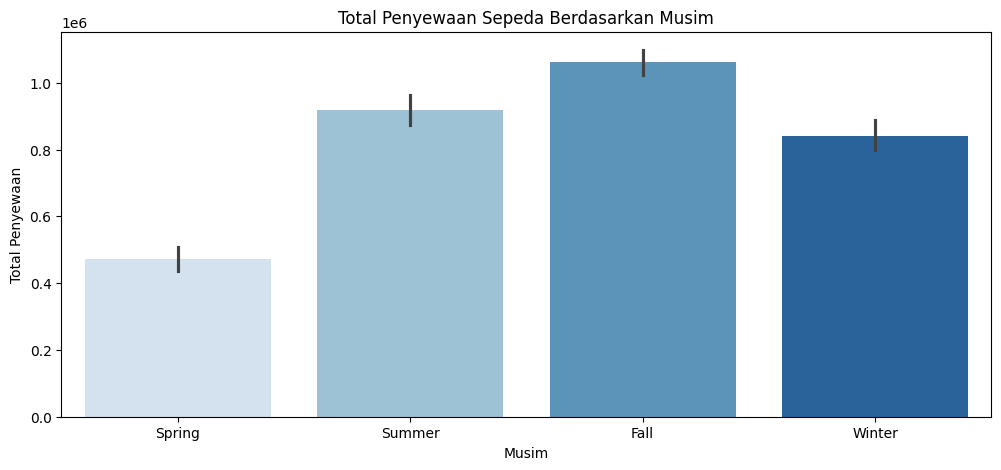

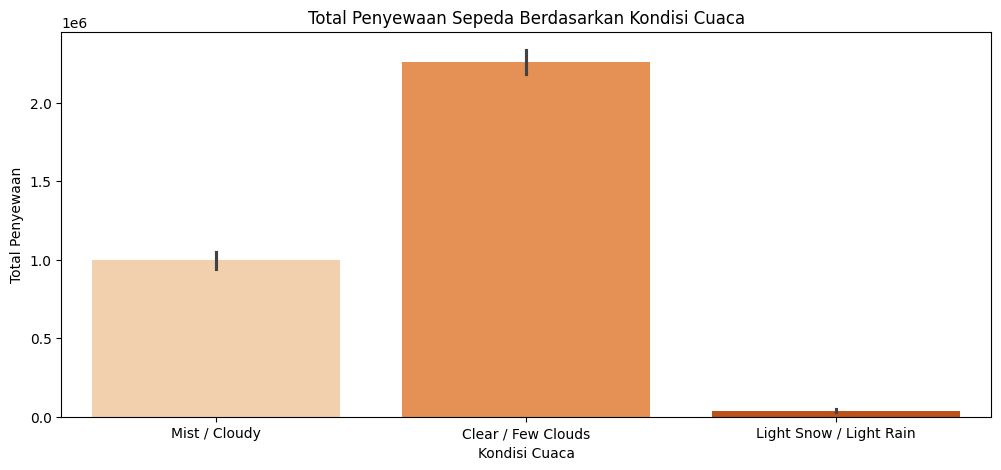

In [51]:
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)


weather_labels = {
    1: 'Clear / Few Clouds',
    2: 'Mist / Cloudy',
    3: 'Light Snow / Light Rain',
    4: 'Heavy Rain / Snow'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)

plt.figure(figsize=(12, 5))
sns.barplot(x='season_label', y='cnt', data=day_df, estimator=sum, 
            order=['Spring', 'Summer', 'Fall', 'Winter'], 
            hue='season_label', palette='Blues', legend=False)  # Tambahkan hue dan legend=False
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='weather_label', y='cnt', data=day_df, estimator=sum, 
            hue='weather_label', palette='Oranges', legend=False)  # Tambahkan hue dan legend=False
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda dalam sehari dan bagaimana pola penggunaannya?

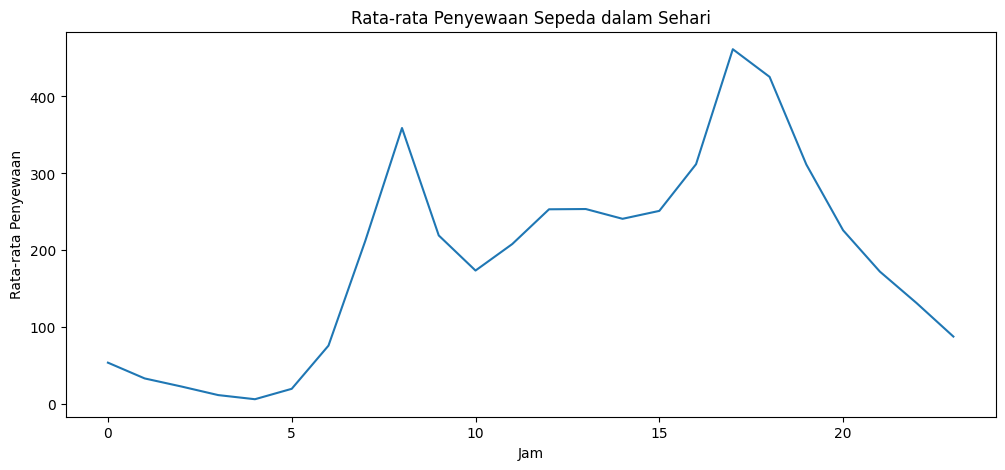

In [52]:
hourly_avg = hour_df.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_avg)
plt.title('Rata-rata Penyewaan Sepeda dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


**Insight:**
1. Pengaruh Musim dan Cuaca terhadap Penyewaan Sepeda
- Dari visualisasi barplot musim, terlihat bahwa musim panas dan gugur memiliki penyewaan tertinggi.
- Dari barplot kondisi cuaca, kondisi cuaca yang baik memiliki jumlah penyewaan tertinggi, sementara hujan dan kabut mengurangi jumlah penyewaan secara signifikan.

2. Pola Penyewaan Sepeda dalam Sehari
- Dari lineplot jumlah penyewaan per jam, terlihat bahwa jam sibuk (08:00 & 17:00) adalah puncak penyewaan, menunjukkan bahwa sepeda sering digunakan sebagai alat transportasi kerja/sekolah.


## Clustering

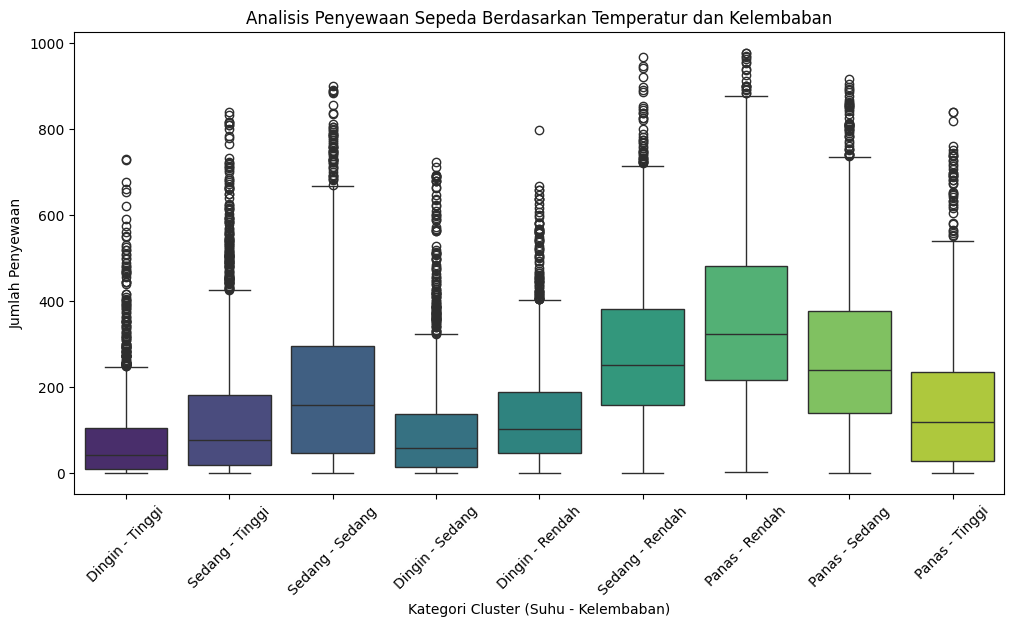

In [53]:
features = ["temp", "hum", "windspeed", "cnt"]
scaler = StandardScaler()
hour_df_scaled = scaler.fit_transform(hour_df[features])

# Analisis clustering tanpa algoritma machine learning
# Menggunakan metode manual untuk mengelompokkan data berdasarkan rentang nilai
hour_df['temp_bin'] = pd.qcut(hour_df['temp'], q=3, labels=['Dingin', 'Sedang', 'Panas'])
hour_df['hum_bin'] = pd.qcut(hour_df['hum'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Mengelompokkan data berdasarkan kombinasi kategori
hour_df['cluster'] = hour_df['temp_bin'].astype(str) + " - " + hour_df['hum_bin'].astype(str)

# Tujuan Analisis
# Menganalisis bagaimana pengaruh suhu dan kelembaban terhadap pola penyewaan sepeda
# Mendapatkan insight tentang kondisi lingkungan yang mempengaruhi jumlah penyewaan

# Visualisasi hasil clustering manual
plt.figure(figsize=(12, 6))
sns.boxplot(x=hour_df['cluster'], y=hour_df['cnt'], hue=hour_df['cluster'], palette='viridis', legend=False)
plt.title('Analisis Penyewaan Sepeda Berdasarkan Temperatur dan Kelembaban')
plt.xlabel('Kategori Cluster (Suhu - Kelembaban)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()



**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada suhu sedang dan kelembaban rendah hingga sedang.
- Ketika suhu tinggi dan kelembaban tinggi, jumlah penyewaan cenderung menurun.
- Temperatur dan kelembaban menjadi faktor utama dalam menentukan pola penyewaan sepeda.

## Conclusion

1. **Musim & Cuaca:** Penyewaan tertinggi di musim panas & gugur, serta saat cuaca cerah. Hujan & salju menurunkan penyewaan.  
2. **Pola Harian:** Puncak penyewaan pagi (07:00-09:00) & sore (17:00-19:00), sejalan dengan jam kerja.  
3. **Clustering (Suhu & Kelembaban):** Penyewaan lebih tinggi saat suhu sedang-panas & kelembaban rendah-sedang. Kondisi dingin & lembab menurunkan permintaan.  

**Insight:** Optimalisasi layanan saat musim ramai & jam sibuk, serta strategi promo di kondisi kurang ideal. 

In [58]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)  # Menggabungkan data
print(all_df.shape)  # Cek ukuran data gabungan

(18110, 23)


In [59]:
all_df.to_csv("all_df.csv", index=False)
print("Data bersih berhasil disimpan sebagai all_df.csv")

Data bersih berhasil disimpan sebagai all_df.csv
